## Using pd.Category as a means to plot data across multiple years on the same X-axis

1. identify day of year that each quantity is associated with
1. form list of adjusted day of year ordering (based on current year)
1. map day of year to adjusted day of year ordering
1. assign index as dates of current year (pd.date_range)

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [24]:
# create range of years
# from 2015 - 2020
years = pd.DataFrame(pd.date_range(pd.to_datetime('2015'), pd.to_datetime(pd.to_datetime('2021-12-31')))) \
    .squeeze().apply(lambda x: x.year).value_counts().sort_index()

In [25]:
# take a look at years and number of days per year
years

2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
Name: 0, dtype: int64

In [218]:
# create empty df to hold years data
all_years = pd.DataFrame()

# for loop 
for i, v in zip([str(x) for x in years.index], years.values):
    
    # for each year generate random data for each day of the year
    year = pd.DataFrame(np.random.randint(10, size=(v, 1)), 
                  columns=[i], 
                  index=pd.date_range(pd.to_datetime(i), pd.to_datetime(pd.to_datetime(f'{i}-12-31'))))
    
    # add a bit more irregularity to the data
    year.loc[year[i] == 5] = np.random.randint(100)
    
    # assign index for each year 
    # to be day of year quantity for each year
    year.index = year.index.dayofyear
    
    # combine all years into single df
    all_years = pd.concat([
        all_years,
        year
    ], axis=1)

In [219]:
# example data of what each year looks like
year.head()

,2021
1,8
2,7
3,1
4,7
5,3


In [220]:
# all years combined
# with day of year as index
all_years.head()

,2015,2016,2017,2018,2019,2020,2021
1,6.0,6,7.0,7.0,2.0,3,8.0
2,0.0,6,1.0,6.0,8.0,7,7.0
3,6.0,6,6.0,59.0,1.0,2,1.0
4,0.0,2,6.0,59.0,8.0,7,7.0
5,0.0,1,0.0,59.0,7.0,3,3.0


### Example scenario with 6/1 - 5/31 calander year

In [221]:
# create two lists and
# add them together
# to create sequencing we want
adj_day_sequence = [x for x in range(pd.to_datetime('2021-10-1').dayofyear, pd.to_datetime('2021-12-31').dayofyear + 2)] + \
[x for x in range(1, pd.to_datetime('2021-9-30').dayofyear + 1)]

In [222]:
len(adj_day_sequence)

366

In [223]:
# review sequencing
str(adj_day_sequence)

'[274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 1

In [224]:
# assign index to be adjusted index sequencing
all_years.index = pd.Categorical(all_years.index, categories=adj_day_sequence, ordered=True)

In [228]:
# find cumulative sum for all years
all_years = all_years.sort_index().cumsum()

### Since 2021 isn't complete remove data for dates that haven't happened yet

In [206]:
# create list with days in the future
future_days = [x for x in range(pd.to_datetime(datetime.datetime.today()).dayofyear, pd.to_datetime('2021-9-30').dayofyear + 2)]

In [229]:
str(future_days)

'[152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274]'

In [230]:
# fill future days with nan values
all_years.loc[future_days, '2021'] = None

In [237]:
# take a look at the data
all_years

,2015,2016,2017,2018,2019,2020,2021
2020-10-01,3.0,3,8.0,0.0,68.0,9,NaN
2020-10-02,7.0,10,14.0,4.0,77.0,10,10.0
2020-10-03,10.0,12,20.0,10.0,84.0,14,12.0
2020-10-04,12.0,21,24.0,12.0,90.0,15,13.0
2020-10-05,21.0,24,27.0,15.0,98.0,21,15.0
...,...,...,...,...,...,...,...
2021-09-27,3355.0,2129,1606.0,3291.0,4003.0,2927,NaN
2021-09-28,3357.0,2130,1614.0,3297.0,4004.0,2935,NaN
2021-09-29,3410.0,2132,1623.0,3306.0,4013.0,2981,NaN
2021-09-30,3418.0,2136,1623.0,3365.0,4013.0,2988,NaN


#### Looking above, we can see that 2 of the years have 366 days.

In [233]:
# assign index to current year dates
all_years.index = pd.date_range(pd.to_datetime('2020-10-1'), pd.to_datetime('2021-10-1'))

In [234]:
all_years.sort_index()

,2015,2016,2017,2018,2019,2020,2021
2020-10-01,3.0,3,8.0,0.0,68.0,9,NaN
2020-10-02,7.0,10,14.0,4.0,77.0,10,10.0
2020-10-03,10.0,12,20.0,10.0,84.0,14,12.0
2020-10-04,12.0,21,24.0,12.0,90.0,15,13.0
2020-10-05,21.0,24,27.0,15.0,98.0,21,15.0
...,...,...,...,...,...,...,...
2021-09-27,3355.0,2129,1606.0,3291.0,4003.0,2927,NaN
2021-09-28,3357.0,2130,1614.0,3297.0,4004.0,2935,NaN
2021-09-29,3410.0,2132,1623.0,3306.0,4013.0,2981,NaN
2021-09-30,3418.0,2136,1623.0,3365.0,4013.0,2988,NaN


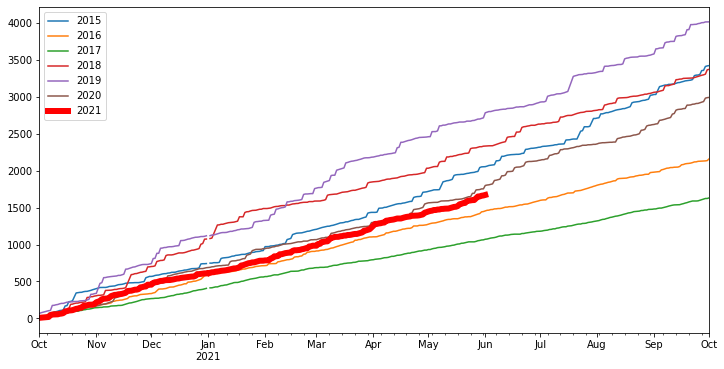

In [235]:
# plot all years except current yera
all_years.iloc[:,:-1].plot(figsize=(12, 6))


# highlight current year by 
# plotting in red with extra thickness
all_years.iloc[:,-1].plot(linewidth=6, color='red')
plt.legend(list(all_years.columns));